In [ ]:
OPEN ENDED LAB 

In [ ]:
WE WILL APPLY 3 MODELS THAT ARE [Logistic Regression,KNN & Naive Bayes]

In [ ]:
First we will import All the Necessary Libraries

In [157]:
import pandas as pd # Used for handling structured data 
import numpy as np  # Provides numerical operations, especially for handling large arrays and mathematical computations.
import matplotlib.pyplot as plt  #Enables plotting graphs such as bar charts, line plots, and confusion matrices.
import seaborn as sns     #create visually appealing and informative statistical graphics.
from sklearn.model_selection import train_test_split, GridSearchCV   # Splits dataset into training and testing subsets
#[ Performs hyperparameter tuning to find the best model parameters].
from sklearn.preprocessing import StandardScaler          #Standardizes features by removing the mean and scaling to unit variance.               
from sklearn.impute import SimpleImputer       # Handles missing values by replacing them with strategies like mean, median
from sklearn.pipeline import Pipeline   #Creates a sequential workflow for data preprocessing.
from sklearn.feature_selection import SelectKBest, f_classif        # Selects the best k features based on a scoring function.
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report    #Measures how well the model predicts correctly
from sklearn.neighbors import KNeighborsClassifier            # Implements the K-Nearest Neighbors (KNN)
from sklearn.naive_bayes import GaussianNB                    # Implements the Gaussian Naive Bayes 
from sklearn.linear_model import LogisticRegression           # Implements logistic regression, 
import gc  # Garbage collector  
import warnings                        

In [186]:
# Suppress warnings                    
warnings.filterwarnings('ignore') #Suppresses unnecessary warnings for cleaner output
np.random.seed(100)               #Ensures reproducibility by fixing the random number generator's seed.

In [188]:
# Define column data types to reduce memory
dtype_dict = {str(i): 'uint8' for i in range(1, 785)}  # Pixel values are 0-255
dtype_dict['label'] = 'uint8'                          #Reduces memory usage when loading the MNIST dataset.


In [190]:
# Load data
train_data = load_data_in_chunks("C:\\Users\\Lap Tech\\Downloads\\mnist_train.csv")
test_data = load_data_in_chunks("C:\\Users\\Lap Tech\\Downloads\\mnist_test.csv")

In [191]:


# Merge datasets
full_data = pd.concat([train_data, test_data], axis=0, ignore_index=True)



In [192]:
# Free memory
del train_data, test_data
gc.collect()

print("Dataset Shape:", full_data.shape)                    #Prints the final dataset shape to confirm successful data merging.

Dataset Shape: (70000, 785)


In [193]:
# Drop NaN labels
full_data_clean = full_data.dropna(subset=['label'])            #Prevents errors during training
print("Shape after dropping NaNs in labels:", full_data_clean.shape)     #Improves data integrity


Shape after dropping NaNs in labels: (70000, 785)


In [194]:
# Separate features and target
X_full = full_data_clean.drop(columns=['label'])           # Contains pixel values
y_full = full_data_clean['label']                          # contais Data values

In [195]:

# Preprocessing pipeline
feature_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),         # Fills missing values with the median of each feature.
    ('scaler', StandardScaler())                          # Standardizes features by removing the mean and scaling to unit variance.
])

In [198]:


# Transform features
X_transformed = feature_pipeline.fit_transform(X_full)      #Applies preprocessing pipeline to the feature set (X_full).
                                                            #Handles missing values using median imputation.

In [203]:


# Feature selection
feature_selector = SelectKBest(score_func=f_classif, k=250)  # Selecting 250 features
X_selected = feature_selector.fit_transform(X_transformed, y_full)      #Selects the top 250 most important features based on statistical relevance
print("Selected Features Count:", X_selected.shape[1])         #  improving model efficiency and reducing overfitting.


Selected Features Count: 250


In [204]:

# Free memory
del X_full, X_transformed     #Deletes large variables
gc.collect()                   #Reduces memory usage to prevent overflow


0

In [205]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    X_selected, y_full, test_size=0.25, random_state=50, stratify=y_full
)

print("Train set shape:", X_train.shape)              #Divides the dataset into training (75%) and testing (25%) sets.
print("Test set shape:", X_test.shape)               #Ensures class balance
                                                    #Maintains reproducibility using random_state=50.

Train set shape: (52500, 250)
Test set shape: (17500, 250)


In [206]:

# Define models
models = {
    'Logistic Regression': LogisticRegression(max_iter=200),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB()
}


In [207]:

# Hyperparameter tuning for KNN
knn_params = {'n_neighbors': [3, 5, 7, 9, 11]}        #Tests multiple values for n_neighbors
knn_grid = GridSearchCV(KNeighborsClassifier(), knn_params, cv=3, scoring='accuracy') #Uses GridSearchCV with 3-fold cross-validation to select the most accurate model.
knn_grid.fit(X_train, y_train)
models['K-Nearest Neighbors'] = knn_grid.best_estimator_

In [208]:

# Train and evaluate models
model_performance = {}
conf_matrices = {}
for model_name, model in models.items():                                         #Trains each model 
    model.fit(X_train, y_train)                                                  #Predicts labels on X_test
    y_pred = model.predict(X_test)                                               #Prints classification reports
    accuracy = accuracy_score(y_test, y_pred)                                    #Stores confusion matrices for further analysis.
    model_performance[model_name] = accuracy
    print(f'{model_name} Accuracy: {accuracy:.4f}')
    print(classification_report(y_test, y_pred))
    conf_matrices[model_name] = confusion_matrix(y_test, y_pred)

Logistic Regression Accuracy: 0.9031
              precision    recall  f1-score   support

           0       0.95      0.96      0.95      1726
           1       0.94      0.96      0.95      1969
           2       0.90      0.87      0.89      1748
           3       0.88      0.87      0.88      1785
           4       0.91      0.91      0.91      1706
           5       0.86      0.85      0.86      1578
           6       0.91      0.95      0.93      1719
           7       0.93      0.91      0.92      1823
           8       0.87      0.86      0.86      1706
           9       0.87      0.88      0.87      1740

    accuracy                           0.90     17500
   macro avg       0.90      0.90      0.90     17500
weighted avg       0.90      0.90      0.90     17500

K-Nearest Neighbors Accuracy: 0.9670
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1726
           1       0.96      1.00      0.98      1969
    

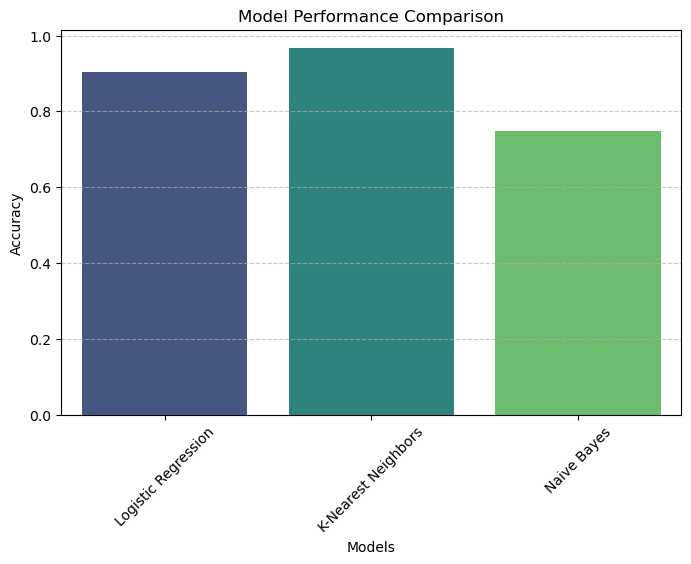

In [179]:
# Visualization - Model Performance
plt.figure(figsize=(8, 5))
sns.barplot(x=list(model_performance.keys()), y=list(model_performance.values()), palette='viridis') 
plt.xlabel('Models')                     #Creates a bar plot to visually compare model accuracy.
plt.ylabel('Accuracy')                   #Rotates x-axis labels for clarity when displaying model names.
plt.title('Model Performance Comparison')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

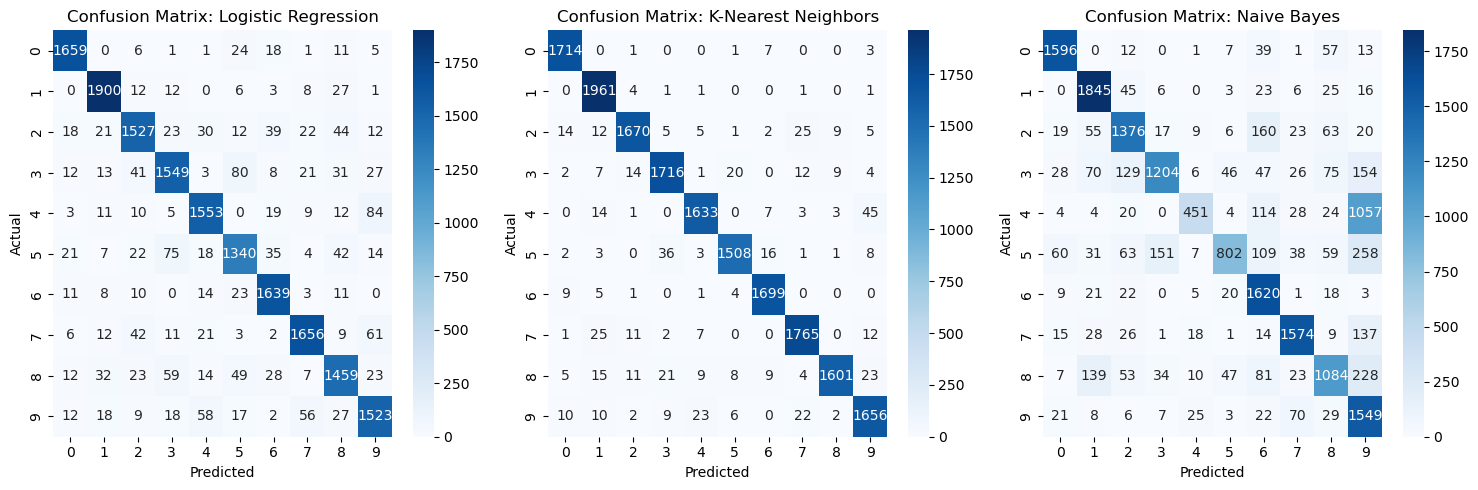

In [180]:

# Visualization - Confusion Matrices
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for ax, (model_name, cm) in zip(axes, conf_matrices.items()):
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)
    ax.set_title(f'Confusion Matrix: {model_name}')
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')
plt.tight_layout()               #Plots confusion matrices for each model using heatmaps.
                              #Shows actual vs. predicted classifications, highlighting misclassifications.
plt.show()
